In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from src.gebpy.core.minerals.tectosilicates import Tectosilicates

In [3]:
n_datasets = 1000

data_afs = Tectosilicates(name="Alkali feldspar", random_seed=42).generate_dataset(number=n_datasets, as_dataframe=True)
data_pl = Tectosilicates(name="Plagioclase", random_seed=42).generate_dataset(number=n_datasets, as_dataframe=True)

In [4]:
data_afs

,mineral,state,M,w.O,w.Na,w.Al,w.Si,w.K,rho,rho_e,...,E,nu,GR,PE,U,p,w.Na2O,w.K2O,w.Al2O3,w.SiO2
0,Afs,variable,270.356,0.473841,0.043386,0.099891,0.311921,0.070960,2586.853,2565.093,...,159.702,0.224304,113.536,2.293,5.882,None,0.058483,0.085479,0.188736,0.667302
1,Afs,variable,266.021,0.481444,0.066982,0.101494,0.316926,0.033155,2606.115,2584.123,...,164.842,0.225876,53.047,1.969,5.089,None,0.090289,0.039938,0.191765,0.678008
2,Afs,variable,270.153,0.474197,0.044491,0.099966,0.312156,0.069190,2587.755,2565.984,...,159.943,0.224380,110.704,2.278,5.845,None,0.059972,0.083346,0.188878,0.667803
3,Afs,variable,262.618,0.487412,0.085505,0.102752,0.320855,0.003477,2621.236,2599.061,...,168.876,0.227033,5.563,1.715,4.459,None,0.115257,0.004188,0.194142,0.686413
4,Afs,variable,263.235,0.486330,0.082146,0.102523,0.320142,0.008858,2618.495,2596.352,...,168.145,0.226828,14.173,1.762,4.573,None,0.110730,0.010671,0.193711,0.684889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Afs,variable,277.699,0.460963,0.003416,0.097176,0.303443,0.135002,2554.223,2532.858,...,150.988,0.221360,216.004,2.841,7.196,None,0.004604,0.162624,0.183607,0.649165
996,Afs,variable,274.918,0.465841,0.018555,0.098204,0.306655,0.110745,2566.583,2545.068,...,154.290,0.222520,177.192,2.633,6.702,None,0.025012,0.133404,0.185550,0.656035
997,Afs,variable,267.760,0.478393,0.057515,0.100850,0.314918,0.048323,2598.387,2576.488,...,162.780,0.225259,77.317,2.099,5.409,None,0.077528,0.058210,0.190550,0.673713
998,Afs,variable,268.449,0.477186,0.053768,0.100596,0.314123,0.054327,2595.328,2573.466,...,161.964,0.225009,86.923,2.151,5.535,None,0.072477,0.065442,0.190069,0.672012


In [5]:
data_afs.head()
data_afs.info()
data_afs.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mineral  1000 non-null   object 
 1   state    1000 non-null   object 
 2   M        1000 non-null   float64
 3   w.O      1000 non-null   float64
 4   w.Na     1000 non-null   float64
 5   w.Al     1000 non-null   float64
 6   w.Si     1000 non-null   float64
 7   w.K      1000 non-null   float64
 8   rho      1000 non-null   float64
 9   rho_e    1000 non-null   float64
 10  V        1000 non-null   float64
 11  vP       1000 non-null   float64
 12  vS       1000 non-null   float64
 13  vP/vS    1000 non-null   float64
 14  K        1000 non-null   float64
 15  G        1000 non-null   float64
 16  E        1000 non-null   float64
 17  nu       1000 non-null   float64
 18  GR       1000 non-null   float64
 19  PE       1000 non-null   float64
 20  U        1000 non-null   float64
 21  p        0 non-

,count,mean,std,min,25%,50%,75%,max
M,1000.0,270.469307,4.553965,262.251000,266.595750,270.632000,274.255500,278.324000
w.O,1000.0,0.473642,0.007986,0.459868,0.467002,0.473357,0.480436,0.488056
w.Na,1000.0,0.042769,0.024787,0.000019,0.022160,0.041885,0.063854,0.087503
w.Al,1000.0,0.099849,0.001684,0.096945,0.098449,0.099789,0.101281,0.102887
w.Si,1000.0,0.311790,0.005257,0.302723,0.307419,0.311603,0.316263,0.321279
w.K,1000.0,0.071950,0.039714,0.000275,0.038167,0.073366,0.104969,0.140445
rho,1000.0,2586.349166,20.234663,2551.450000,2569.525250,2585.627500,2603.562000,2622.868000
rho_e,1000.0,2564.595213,19.990114,2530.118000,2547.975250,2563.882500,2581.599750,2600.673000
V,1000.0,104.638613,2.577495,99.987000,102.446000,104.730500,106.781500,109.084000
vP,1000.0,8417.675323,120.532512,8206.025000,8317.986750,8415.177500,8520.734250,8631.340000


In [7]:
data_pl

,mineral,state,M,w.O,w.Na,w.Al,w.Si,w.Ca,rho,rho_e,...,E,nu,GR,PE,U,p,w.Na2O,w.CaO,w.Al2O3,w.SiO2
0,Pl,variable,290.539,0.444680,0.043386,0.136566,0.248152,0.127216,2891.488,2869.080,...,175.821,0.231512,0,2.987,8.571,None,0.058483,0.178000,0.258032,0.530878
1,Pl,variable,275.451,0.467819,0.066982,0.118629,0.287131,0.059439,2748.450,2726.154,...,172.375,0.229250,0,2.294,6.253,None,0.090289,0.083167,0.224141,0.614267
2,Pl,variable,289.832,0.445764,0.044491,0.135726,0.249977,0.124042,2884.790,2862.387,...,175.660,0.231409,0,2.955,8.458,None,0.059972,0.173559,0.256445,0.534783
3,Pl,variable,263.607,0.485983,0.085505,0.104549,0.317730,0.006233,2636.163,2613.956,...,169.666,0.227388,0,1.749,4.573,None,0.115257,0.008722,0.197537,0.679729
4,Pl,variable,265.754,0.482689,0.082146,0.107102,0.312182,0.015881,2656.523,2634.300,...,170.158,0.227732,0,1.848,4.869,None,0.110730,0.022220,0.202361,0.667859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Pl,variable,316.098,0.405484,0.003416,0.166951,0.182122,0.242029,3133.793,3111.195,...,181.647,0.235087,0,4.162,12.949,None,0.004604,0.338646,0.315442,0.389618
996,Pl,variable,306.417,0.420330,0.018555,0.155443,0.207132,0.198541,3042.015,3019.489,...,179.442,0.233769,0,3.717,11.224,None,0.025012,0.277798,0.293697,0.443123
997,Pl,variable,281.505,0.458535,0.057515,0.125826,0.271492,0.086633,2805.840,2783.500,...,173.759,0.230172,0,2.572,7.159,None,0.077528,0.121216,0.237739,0.580809
998,Pl,variable,283.901,0.454860,0.053768,0.128675,0.265301,0.097396,2828.556,2806.197,...,174.306,0.230532,0,2.682,7.527,None,0.072477,0.136276,0.243121,0.567567


In [8]:
data_pl.head()
data_pl.info()
data_pl.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mineral  1000 non-null   object 
 1   state    1000 non-null   object 
 2   M        1000 non-null   float64
 3   w.O      1000 non-null   float64
 4   w.Na     1000 non-null   float64
 5   w.Al     1000 non-null   float64
 6   w.Si     1000 non-null   float64
 7   w.Ca     1000 non-null   float64
 8   rho      1000 non-null   float64
 9   rho_e    1000 non-null   float64
 10  V        1000 non-null   float64
 11  vP       1000 non-null   float64
 12  vS       1000 non-null   float64
 13  vP/vS    1000 non-null   float64
 14  K        1000 non-null   float64
 15  G        1000 non-null   float64
 16  E        1000 non-null   float64
 17  nu       1000 non-null   float64
 18  GR       1000 non-null   int64  
 19  PE       1000 non-null   float64
 20  U        1000 non-null   float64
 21  p        0 non-

,count,mean,std,min,25%,50%,75%,max
M,1000.0,290.933798,15.849788,262.329000,277.451000,291.499000,304.111500,318.270000
w.O,1000.0,0.444075,0.024307,0.402152,0.423865,0.443207,0.464752,0.487943
w.Na,1000.0,0.042769,0.024787,0.000019,0.022160,0.041885,0.063854,0.087503
w.Al,1000.0,0.137036,0.018843,0.103029,0.121008,0.137708,0.152702,0.169534
w.Si,1000.0,0.247132,0.040947,0.176510,0.213087,0.245671,0.281963,0.321032
w.Ca,1000.0,0.128989,0.071199,0.000493,0.068424,0.131529,0.188186,0.251786
rho,1000.0,2895.231298,150.259768,2624.048000,2767.412500,2900.590500,3020.161500,3154.386000
rho_e,1000.0,2872.820686,150.141880,2601.850000,2745.102500,2878.175500,2997.653500,3131.772000
V,1000.0,100.444825,0.262638,99.971000,100.221750,100.454000,100.663250,100.898000
vP,1000.0,8408.499455,116.812852,8217.547000,8310.269250,8399.120500,8505.871750,8631.179000


In [10]:
#variances = data_afs.var().sort_values()
variances = data_afs.select_dtypes(include="number").var().sort_values()
variances

w.Al           0.000003
nu             0.000003
w.Al2O3        0.000010
vP/vS          0.000011
w.Si           0.000028
w.O            0.000064
w.SiO2         0.000126
w.Na           0.000614
w.Na2O         0.001116
w.K            0.001577
w.K2O          0.002289
PE             0.115515
U              0.682244
G              4.471941
V              6.643481
K             14.935970
M             20.738594
E             29.175896
rho_e        399.604656
rho          409.441583
vS          3819.001014
GR          4037.678274
vP         14528.086386
dtype: float64

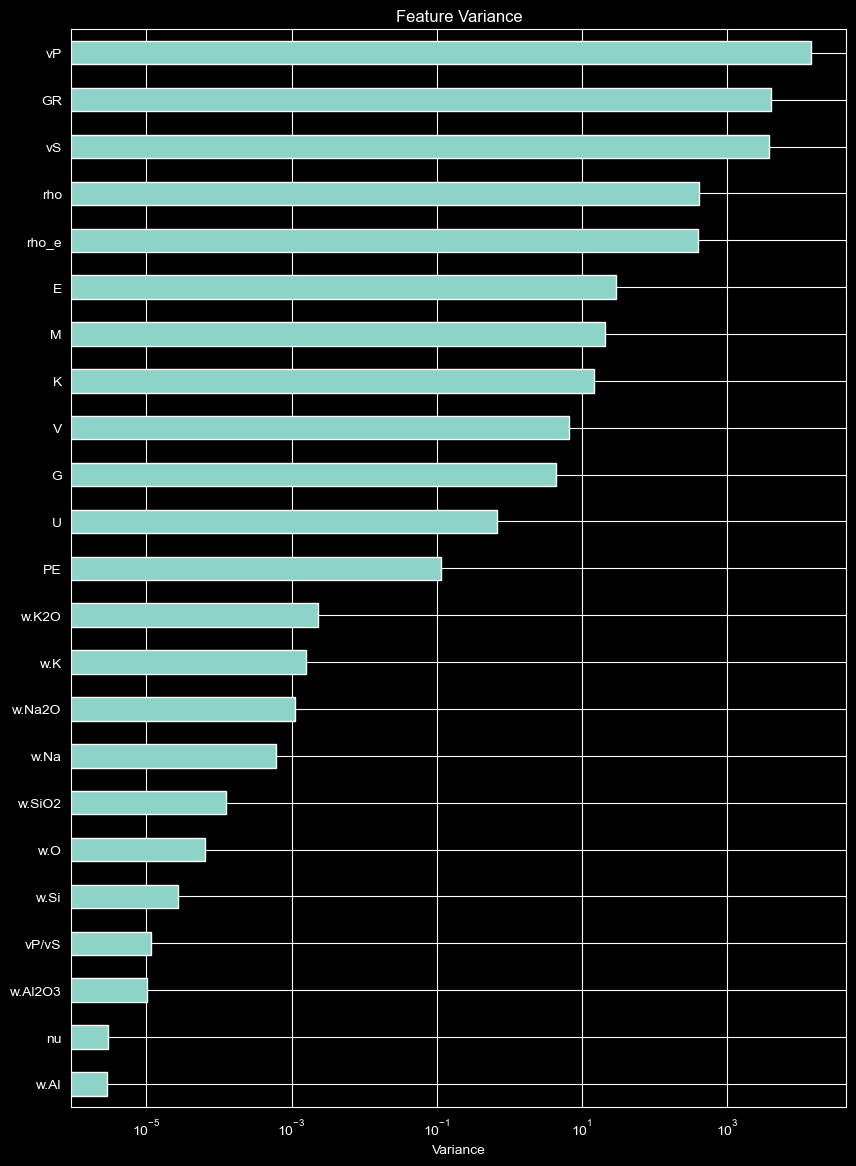

In [11]:
plt.figure(figsize=(10, 14))
variances.plot(kind='barh')
plt.title("Feature Variance")
plt.xlabel("Variance")
plt.xscale("log")
plt.show()

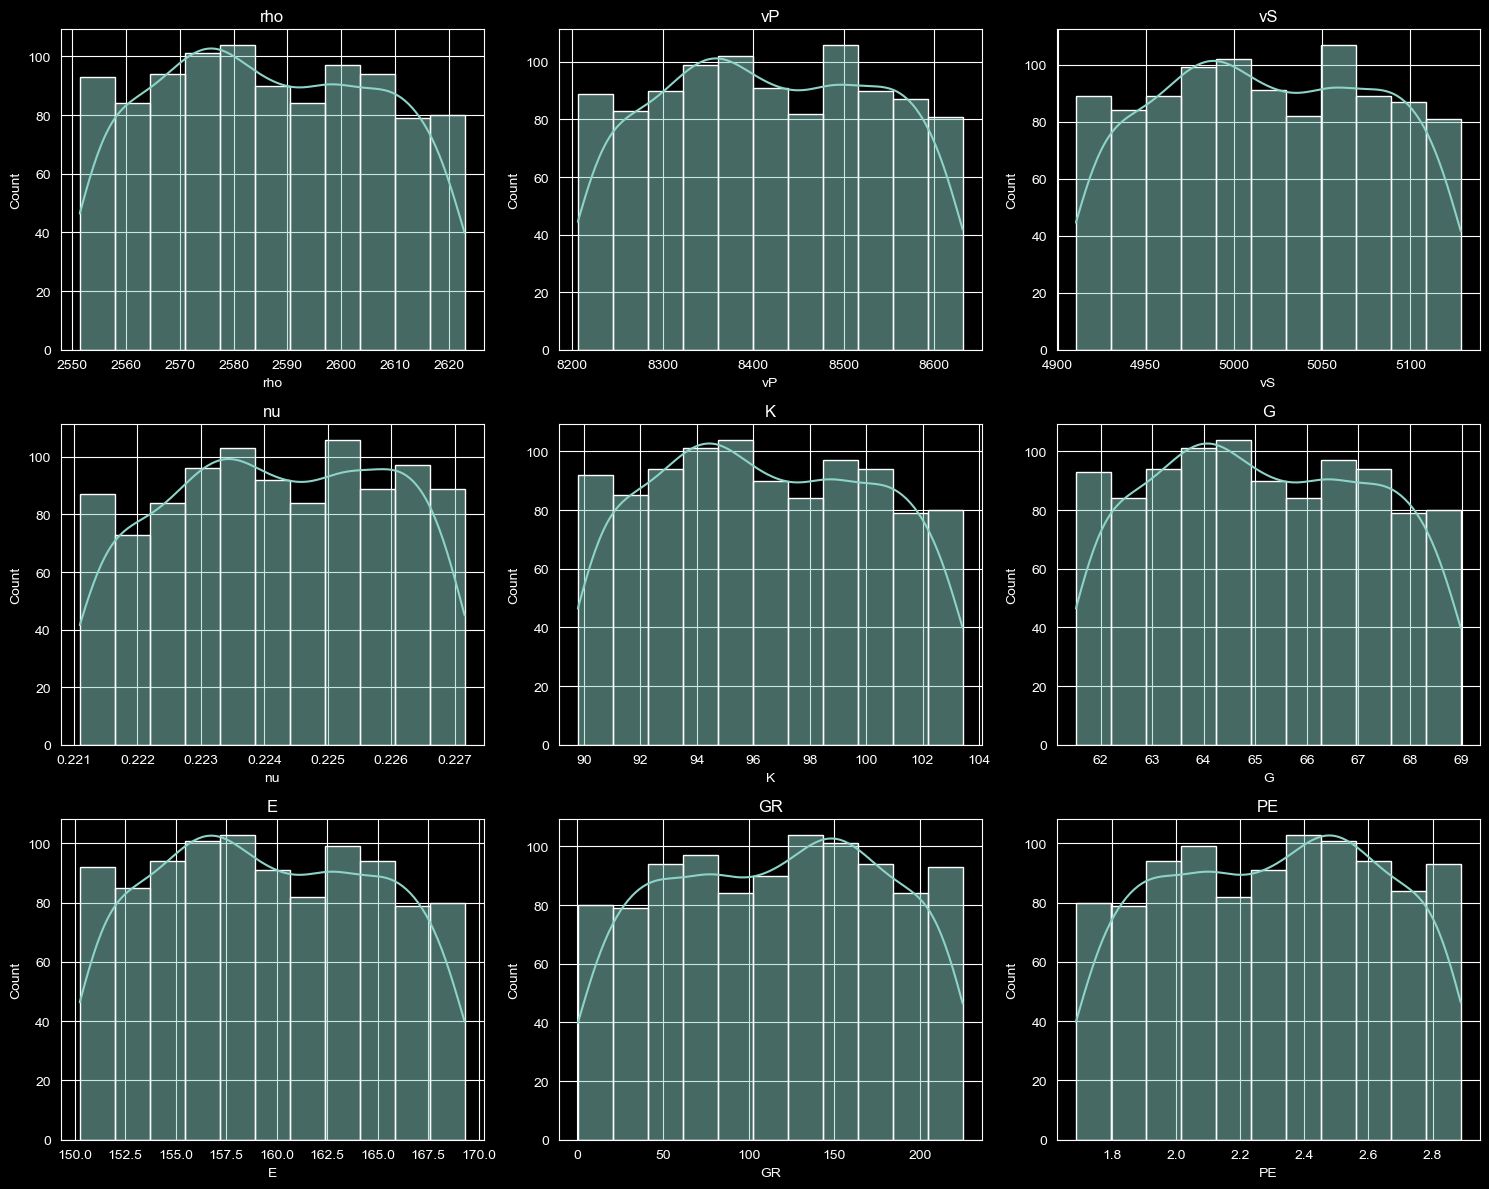

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

columns = ["rho", "vP", "vS", "nu", "K", "G", "E", "GR", "PE"]

for ax, col in zip(axes, columns):
    sns.histplot(data_afs[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()

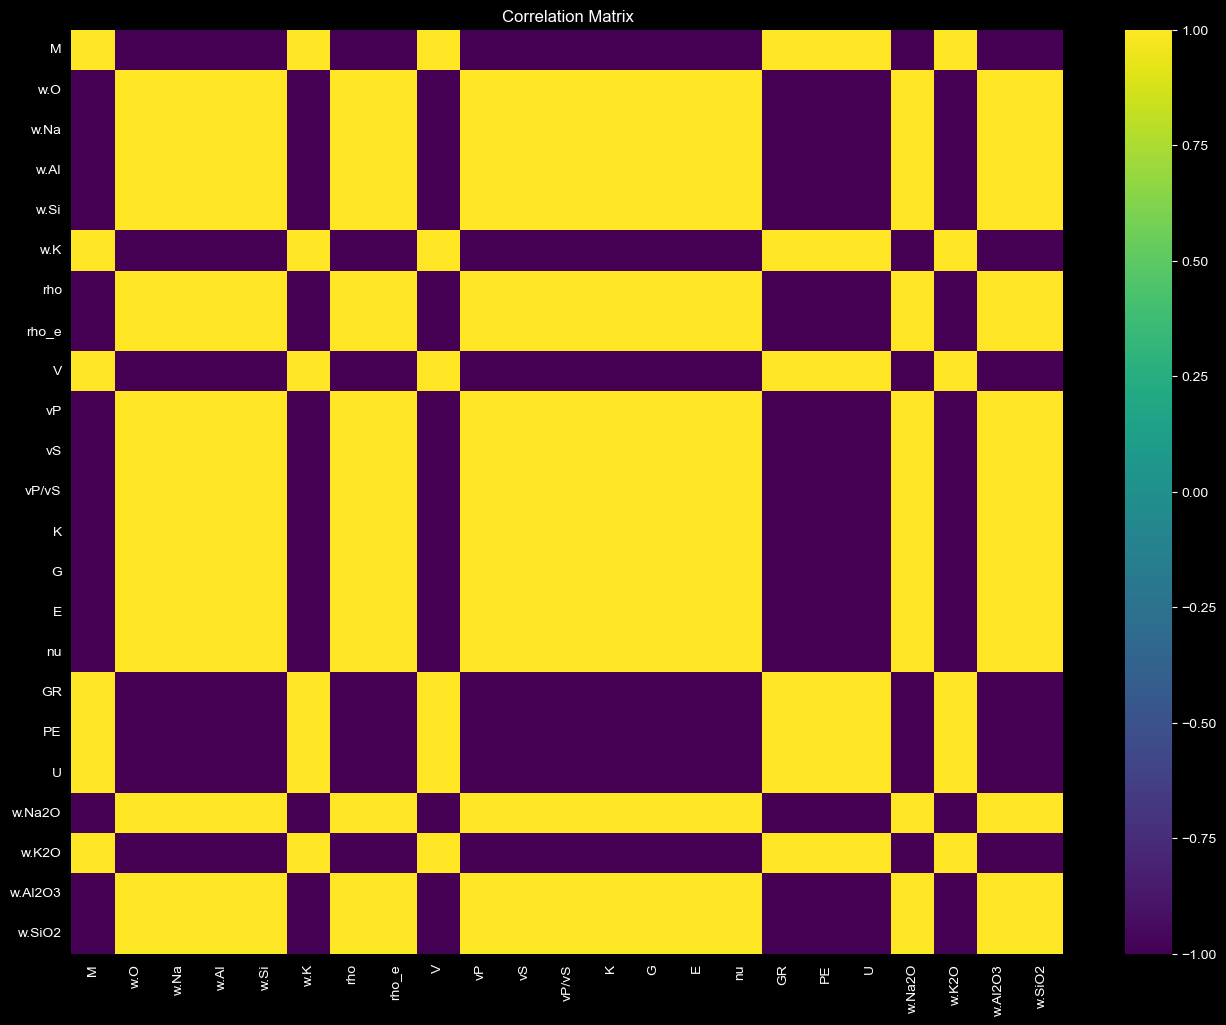

In [18]:
plt.figure(figsize=(16, 12))
#corr = data_afs.corr()
corr = data_afs.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=False, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

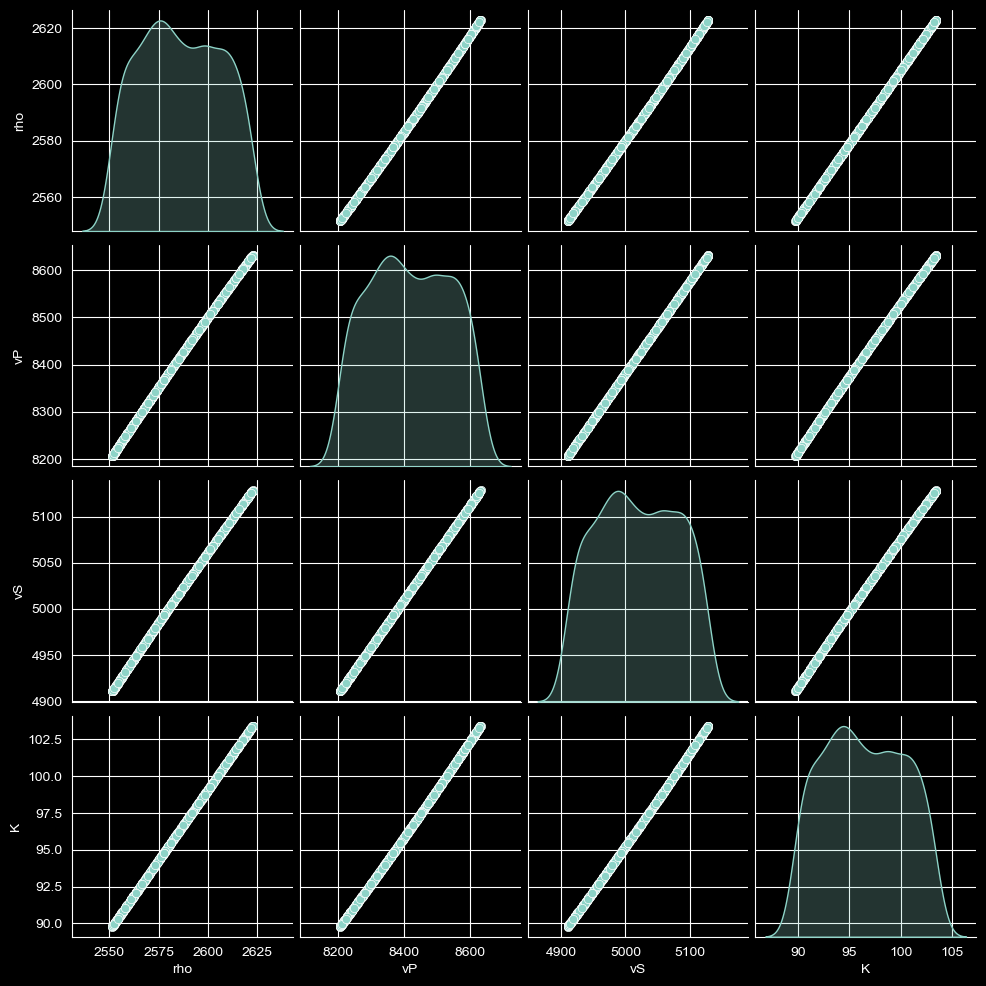

In [20]:
sns.pairplot(data_afs[["rho", "vP", "vS", "K"]], diag_kind="kde")

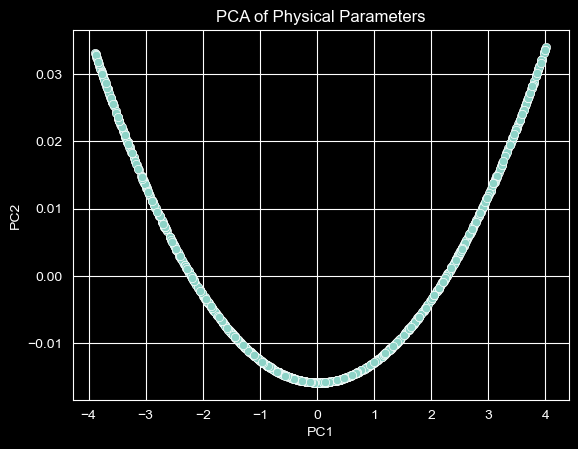

,PC1,PC2
rho,0.447217,0.364723
vP,0.447207,-0.578782
vS,0.447210,-0.515577
w.Si,0.447217,0.364743
w.O,0.447217,0.364872


In [22]:
#X = data_afs[["rho", "vP", "vS", "porosity", "E", "G", "K"]]
X = data_afs[["rho", "vP", "vS", "w.Si", "w.O"]]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(components, columns=["PC1", "PC2"])

sns.scatterplot(x="PC1", y="PC2", data=df_pca)
plt.title("PCA of Physical Parameters")
plt.show()

loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=["PC1", "PC2"]
)
loadings

In [23]:
# Export dataframe to csv
data_pl.to_csv("data_plagioclase_" + str(n_datasets) + ".csv", index=False)